In [1]:
import numpy as np
import matplotlib.pylab as plt 
from getdist import plots, MCSamples
from utils.helpers import pickle_load 

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 15

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
color1 = '#50C878' #'#B5CA8D'
color3 = '#222E50'
alpha = 0.9
palefactor = 0.9
linewidth = 2 
contours = [0.68,0.95]

In [2]:
KEYS = ['sigma8', 'Omegac', 'Omegab', 'hubble', 'ns',
        'm1', 'm2', 'm3', 'm4',
        'dz_wl_1', 'dz_wl_2', 'dz_wl_3', 'dz_wl_4',
        'a_ia', 'eta',
        'b1', 'b2', 'b3', 'b4', 'b5', 
        'dz_gc_1', 'dz_gc_2', 'dz_gc_3', 'dz_gc_4', 'dz_gc_5']

## Emulator and JAX-COSMO

In [3]:
# if we use EMCEE

# emulator_1 = pickle_load('samples', 'emulator_emcee_1')
# emulator_2 = pickle_load('samples', 'emulator_emcee_2')

# emulator_samples_1 = emulator_1.get_chain(discard = 1000, thin = 30, flat = True) 
# emulator_samples_2 = emulator_2.get_chain(discard = 1000, thin = 30, flat = True)
# emulator_samples = np.concatenate([emulator_samples_1, emulator_samples_2], axis = 0)

# jaxcosmo_1 = pickle_load('samples', 'jaxcosmo_emcee_1')
# jaxcosmo_2 = pickle_load('samples', 'jaxcosmo_emcee_2')

# jaxcosmo_samples_1 = jaxcosmo_1.get_chain(discard = 1000, thin = 30, flat = True) 
# jaxcosmo_samples_2 = jaxcosmo_2.get_chain(discard = 1000, thin = 30, flat = True)
# jaxcosmo_samples = np.concatenate([jaxcosmo_samples_1, jaxcosmo_samples_2], axis = 0)

In [18]:
# if we use NUTS instead 

emulator_nuts = pickle_load('samples', 'emulator_nuts_small_ss_high_td')
emulator_samples = np.asarray([np.asarray(emulator_nuts.get_samples()[key]) for key in KEYS]).T

jaxcosmo_nuts = pickle_load('samples', 'jaxcosmo_nuts_small_ss_high_td')
jaxcosmo_samples = np.asarray([np.asarray(jaxcosmo_nuts.get_samples()[key]) for key in KEYS]).T

## Planck Samples

In [5]:
folder = '/home/arrykrishna/Desktop/Planck/base/plikHM_TTTEEE_lowl_lowE/'

c1 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_1.txt')
c2 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_2.txt')
c3 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_3.txt')
c4 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_4.txt')

s1 = np.array([c1[:,31], c1[:,36]]).T
s2 = np.array([c2[:,31], c2[:,36]]).T
s3 = np.array([c3[:,31], c3[:,36]]).T
s4 = np.array([c4[:,31], c4[:,36]]).T

samples_planck = np.concatenate([s1, s2, s3, s4])

## Plot

In [19]:
emu_omega_matter = emulator_samples[:,1] + emulator_samples[:,2]
emu_s8_parameter = emulator_samples[:,0] * np.sqrt(emu_omega_matter/0.3)
emu_om_s8 = np.c_[np.atleast_2d(emu_omega_matter).T, np.atleast_2d(emu_s8_parameter).T]

jc_omega_matter = jaxcosmo_samples[:,1] + jaxcosmo_samples[:,2]
jc_s8_parameter = jaxcosmo_samples[:,0] * np.sqrt(jc_omega_matter/0.3)
jc_om_s8 = np.c_[np.atleast_2d(jc_omega_matter).T, np.atleast_2d(jc_s8_parameter).T]

In [81]:
names    = ["x%s"%i for i in range(2)]
labels   =  [r'$\Omega_{m}$', r'$S_{8}=\sigma_{8}\sqrt{\Omega_{m}/0.3}$']

samples_getdist_1 = MCSamples(samples=emu_om_s8,names = names, labels = labels, settings = settings)
samples_getdist_2 = MCSamples(samples=jc_om_s8,names = names, labels = labels, settings = settings)
samples_getdist_p = MCSamples(samples=samples_planck,names = names, labels = labels, settings = settings)

Removed no burn in
Removed no burn in
Removed no burn in


In [82]:
legend_labels_ = ['Emulator', 'JAX-COSMO', 'Planck 2018']

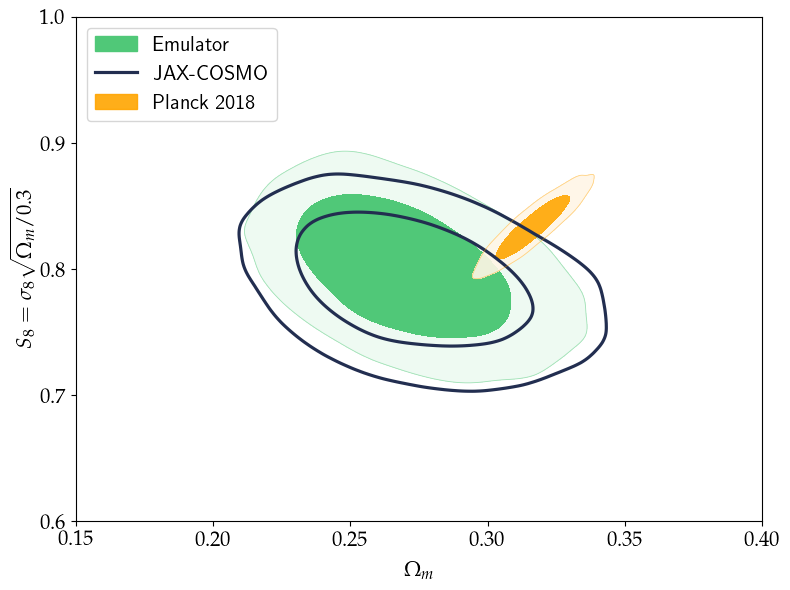

In [83]:
G = plots.getSinglePlotter(width_inch=8, ratio=0.75)
G.settings.num_plot_contours = 2
G.settings.lw_contour = 0.2
G.settings.axes_fontsize = 15
G.settings.lab_fontsize = 15
G.settings.solid_contour_palefactor = 0.9
G.settings.alpha_filled_add = alpha
G.settings.legend_fontsize = 15
G.plot_2d([samples_getdist_1, samples_getdist_2, samples_getdist_p], 'x0', 'x1', filled=[True, False, True], colors =[color1, color3, 'orange'], lims = [0.15, 0.4, 0.6, 1.0])
G.add_legend(legend_labels_, legend_loc='upper left');
# plt.savefig(f'plots/S8_OM_comparison.pdf', bbox_inches = 'tight')
plt.show()

## Summary Statistics

In [21]:
np.set_printoptions(precision=3, suppress=True)

In [22]:
np.mean(emu_om_s8, axis = 0)

array([0.273, 0.797])

In [23]:
np.std(emu_om_s8, axis = 0)

array([0.025, 0.036])

In [24]:
np.mean(jc_om_s8, axis = 0)

array([0.274, 0.788])

In [25]:
np.std(jc_om_s8, axis = 0)

array([0.028, 0.034])

In [26]:
np.mean(samples_planck, axis = 0)

array([0.316, 0.834])

In [27]:
np.std(samples_planck, axis = 0)

array([0.009, 0.016])

## Distance 
Calculated with respect to Planck.

In [13]:
def distance_planck(new_samples, planck_samples, sigma_planck = False):

    diff = np.abs(np.mean(new_samples) - np.mean(planck_samples))
    if sigma_planck:
        return diff / np.std(planck_samples)
    return diff / np.sqrt(np.var(new_samples) + np.var(planck_samples))

In [14]:
distance_planck(emu_om_s8[:,1], samples_planck[:,1], sigma_planck = False)

0.8805825643144466

In [15]:
distance_planck(jc_om_s8[:,1], samples_planck[:,1], sigma_planck = False)

1.1891880982592087

In [16]:
distance_planck(emu_om_s8[:,1], samples_planck[:,1], sigma_planck = True)

2.135671578855333

In [17]:
distance_planck(jc_om_s8[:,1], samples_planck[:,1], sigma_planck = True)

2.7791150703677907